In [32]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

import scipy.sparse as sp
import scipy.sparse.linalg as spla

import scipy.fftpack as fft

matplotlib.rcParams.update({'font.size': 14})

In [2]:
def fast_tri_diag(a, b, fs):
    n = len(fs)
    f_hat = fft.dst(fs,type=1)/(2*n+2)
    u_hat = f_hat / (2*a * np.cos(np.pi*np.arange(1,n+1)/(n+1)) + b)
    return fft.idst(u_hat, type=1)

In [5]:
N = 10**7
a = 0
b = np.pi

h = (b-a)/(N)
xs = np.linspace(a+h, b-h, N-1)

fs = np.sin(xs)

a_mat, b_mat = 1/h**2, -2/h**2
D = sp.diags( [[a_mat]*(N-2), [b_mat]*(N-1), [a_mat]*(N-2)], offsets=[-1,0,1], format='csr')

print(la.norm( spla.spsolve(D, fs) - fast_tri_diag(a_mat, b_mat, fs)))



0.0006261423314452096


In [6]:
def test_dst(x):
    N = len(x)+1
    sines = np.sin(np.pi/N * np.multiply.outer(np.arange(1,N), np.arange(1,N)))
    return 1/N * sines @ x
    
def test_idst(x):
    N = len(x)+1
    sines = np.sin(np.pi/N * np.multiply.outer(np.arange(1,N), np.arange(1,N)))
    return 2 * sines @ x

In [26]:
n = 5000
x = np.random.randn(n)

In [27]:
la.norm(fft.dst(x, type=1)/(2*n+2) - test_dst(x))

4.903179083920798e-12

In [24]:
%%timeit
test = fft.dst(x, type=1)/(2*n+2)

100 loops, best of 3: 4.51 ms per loop


In [25]:
%%timeit
test = test_dst(x)

1 loop, best of 3: 1.02 s per loop


[ 1.99601127 -0.99601852  0.66534584 -0.49801909  0.39921801]


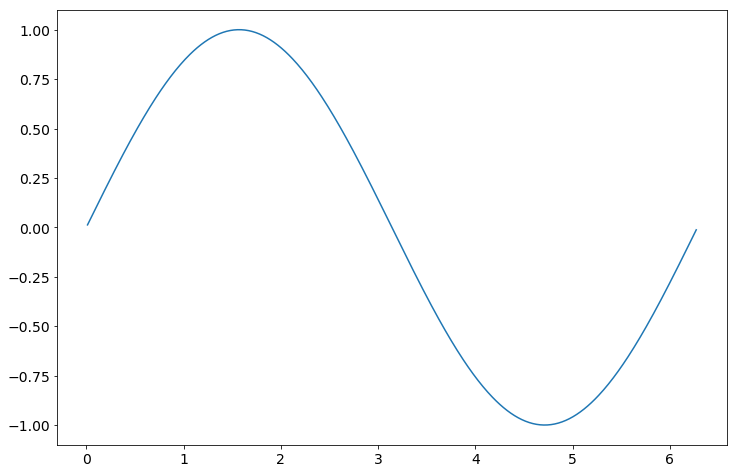

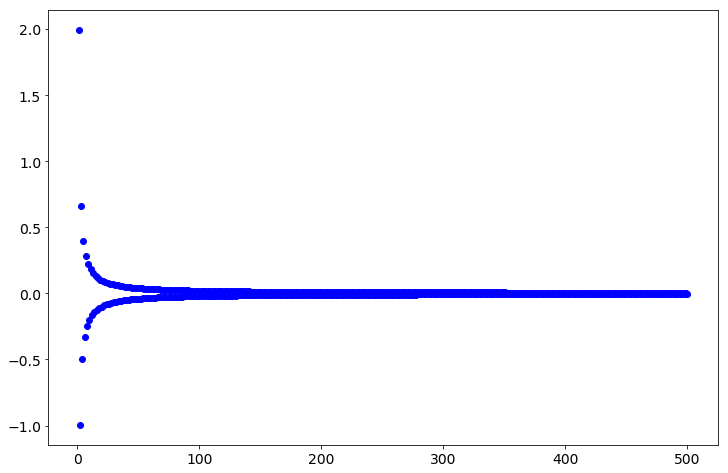

In [44]:
N = 500
a, b = 0, 2*np.pi
h = (b-a)/(N+1)

xs = np.linspace(a+h,b-h,N)

fs = np.sin(xs)
f_hat = fft.dst(xs)/(2*N+2)
print(f_hat[:5])

plt.figure(figsize=(12,8))
plt.plot(xs, fs)
plt.show()
plt.figure(figsize=(12,8))
plt.plot(range(1,N+1), f_hat, 'bo')
plt.show()

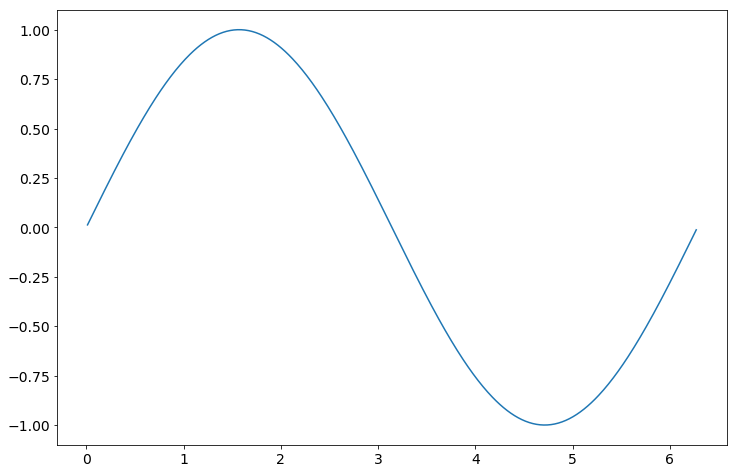

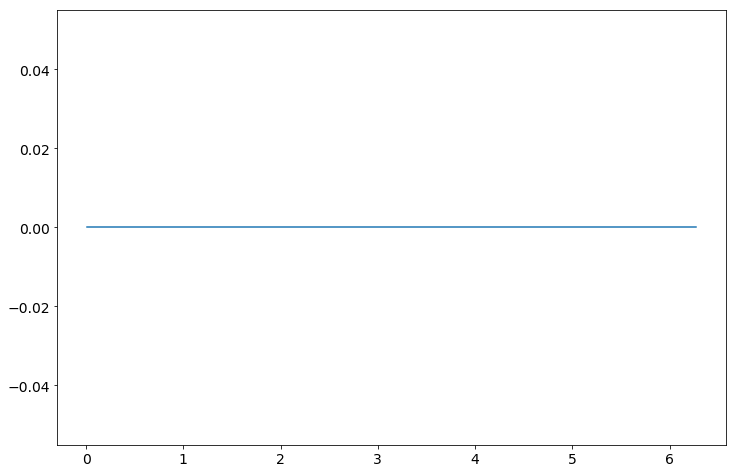

In [45]:
f_hat = np.zeros(N)
f_hat[0] = 1
f = fft.idst(f_hat, type=1)
plt.figure(figsize=(12,8))
plt.plot(xs, fs)
plt.show()
plt.figure(figsize=(12,8))
plt.plot(xs, fs - np.sin(xs))
p
plt.show()